In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [25]:
# Esse código recebe os dados em formato txt 
# salvos no repositório do projeto, e transforma em um DataFrame

experimento = {}

# gerando lista de medidas:
listaDeMedidas =[]
cont = 0.5
while cont <= 10: 
    listaDeMedidas.append(cont)
    cont += 0.5

sizeMedidas = len(listaDeMedidas)
for i in range(sizeMedidas):
    medida = listaDeMedidas[i]
    nomeDoAquivo = "dados/experimento4/" + str(medida) + ' m.txt'
    arquivo = open(nomeDoAquivo, 'r')
    
    dados = str()
    for linha in arquivo :
        dados = linha
        break # só estou interessado na primeira linha do arquivo
    
    # transformação de string para lista
    stringSize = len(dados)
    dados = dados[1:stringSize-2]
    dados = dados.split(', ')
    
    sizeDados = len(dados)
    difVazios = 100 - sizeDados # complementar o dataframe com valores vazios
    complementoDados = difVazios*[np.nan] 
    dados += complementoDados
    
    # converte os dados de string para tipo de dados numerico
    
    for j in range(sizeDados):
        dados[j] = int(dados[j])
    
    # criando dicionário 
    coluna = str(medida) + 'm'
    experimento[coluna] = dados

# Gerando um DataFrame
experimento = pd.DataFrame(data=experimento)
experimento

,0.5m,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
0,-48,-74.0,-72.0,-69.0,-74.0,-74.0,-69.0,-75.0,-77.0,-77.0,-80.0,-82.0,-77.0,-75.0,-81.0,-77.0,-81.0,-84.0,-83.0,-81.0
1,-46,-69.0,-74.0,-69.0,-76.0,-73.0,-82.0,-74.0,-76.0,-78.0,-83.0,-83.0,-75.0,-75.0,-81.0,-77.0,-80.0,-82.0,-82.0,-80.0
2,-53,-78.0,-72.0,-71.0,-85.0,-76.0,-74.0,-74.0,-75.0,-78.0,-77.0,-84.0,-81.0,-77.0,-85.0,-77.0,-80.0,-83.0,-83.0,-81.0
3,-48,-70.0,-72.0,-82.0,-77.0,-74.0,-83.0,-73.0,-77.0,-78.0,-74.0,-84.0,-81.0,-77.0,-82.0,-77.0,-81.0,-84.0,-81.0,-80.0
4,-50,-76.0,-71.0,-81.0,-75.0,-74.0,-73.0,-73.0,-75.0,-79.0,-73.0,-84.0,-76.0,-78.0,-83.0,-77.0,-81.0,-83.0,-83.0,-79.0
5,-56,-78.0,-73.0,-78.0,-85.0,-75.0,-73.0,-73.0,-75.0,-78.0,-81.0,-81.0,-81.0,-75.0,-83.0,-83.0,-81.0,-83.0,-83.0,-81.0
6,-50,-78.0,-74.0,-83.0,-75.0,-74.0,-86.0,-72.0,-75.0,-78.0,-80.0,-84.0,-81.0,-76.0,-76.0,-76.0,-81.0,-83.0,-81.0,-81.0
7,-50,-80.0,-71.0,-71.0,-75.0,-86.0,-74.0,-73.0,-77.0,-79.0,-74.0,-84.0,-80.0,-76.0,-76.0,-77.0,-80.0,-82.0,-81.0,-83.0
8,-49,-66.0,-75.0,-71.0,-77.0,-74.0,-74.0,-73.0,-75.0,-79.0,-82.0,-84.0,-75.0,-75.0,-83.0,-77.0,-81.0,-84.0,-84.0,-81.0
9,-54,-72.0,-75.0,-82.0,-85.0,-73.0,-82.0,-73.0,-77.0,-78.0,-82.0,-84.0,-81.0,-75.0,-76.0,-82.0,-80.0,-84.0,-83.0,-81.0


In [26]:
descricaoDosDados = experimento.describe()

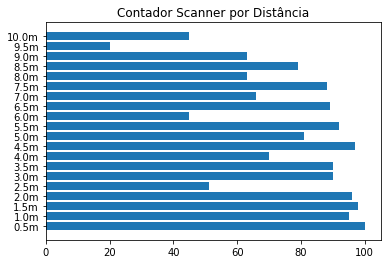

In [27]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][0])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Contador Scanner por Distância')
plt.savefig('graficocountdescribe.png')
plt.show()




In [28]:
descricaoDosDados = experimento.describe()
descricaoDosDados

,0.5m,1.0m,1.5m,2.0m,2.5m,3.0m,3.5m,4.0m,4.5m,5.0m,5.5m,6.0m,6.5m,7.0m,7.5m,8.0m,8.5m,9.0m,9.5m,10.0m
count,100.000000,95.000000,98.00000,96.000000,51.000000,90.000000,90.000000,70.000000,97.000000,81.000000,92.000000,45.000000,89.000000,66.000000,88.000000,63.000000,79.000000,63.000000,20.000000,45.000000
mean,-51.420000,-73.494737,-73.00000,-75.895833,-78.196078,-74.088889,-76.588889,-73.142857,-76.309278,-77.876543,-78.456522,-83.422222,-79.393258,-75.772727,-80.102273,-79.142857,-81.822785,-83.079365,-82.350000,-81.133333
std,3.219825,3.652087,1.77613,4.938526,4.152202,2.874313,4.439087,1.457472,1.236265,0.796598,3.777938,1.514909,3.028719,1.237808,2.686876,2.428707,1.184943,1.208860,1.225819,1.531488
min,-61.000000,-82.000000,-77.00000,-83.000000,-87.000000,-87.000000,-86.000000,-81.000000,-79.000000,-79.000000,-84.000000,-87.000000,-84.000000,-78.000000,-85.000000,-84.000000,-85.000000,-86.000000,-84.000000,-88.000000
25%,-54.000000,-76.000000,-74.00000,-81.000000,-82.000000,-74.000000,-82.000000,-73.000000,-77.000000,-78.000000,-82.000000,-84.000000,-83.000000,-77.000000,-82.250000,-81.000000,-83.000000,-84.000000,-83.000000,-81.000000
50%,-50.000000,-74.000000,-72.00000,-75.500000,-76.000000,-74.000000,-74.000000,-73.000000,-77.000000,-78.000000,-80.000000,-84.000000,-79.000000,-76.000000,-82.000000,-79.000000,-82.000000,-83.000000,-83.000000,-81.000000
75%,-49.000000,-71.000000,-72.00000,-71.000000,-75.000000,-73.000000,-74.000000,-73.000000,-75.000000,-78.000000,-74.000000,-82.000000,-77.000000,-75.000000,-77.000000,-77.000000,-81.000000,-83.000000,-81.000000,-80.000000
max,-46.000000,-65.000000,-70.00000,-69.000000,-74.000000,-70.000000,-69.000000,-72.000000,-74.000000,-73.000000,-73.000000,-81.000000,-74.000000,-73.000000,-76.000000,-75.000000,-80.000000,-80.000000,-80.000000,-79.000000


In [29]:
resultados = {'d0(m)': [], 'd(m)': [], 'β0(dB)': [],  'RSSI(dBm)' : [], "PTx(dBm)": [], 'PL(dB)': [],  'x': [], 'y': [] }


d0 = 1.0 # valor fixo
d = 1.0 # distancia de medição, inicia em 1.0; 
tx = -59
f = (2.426) * math.pow(10,9)  # frenquencia do meio, Beacon BLE
c = 3 * math.pow(10,8)  
λ = c/f                 # comprimento de onda

β0 = (4 * math.pi * d0)/ λ
β0 = math.pow(β0,2)        # eleva ao quadrado
β0 = 10 * math.log10(β0)      # mudando a unidade de betaZero para dB


for i in descricaoDosDados:
    if i == '0.5m':
        continue # não estamos interessados na primeira medida; próximo 'i'
    
    RSSI = descricaoDosDados[i][5]
    pL = tx - RSSI
    
    #n = (pL - β0)/10*math.log10(d/d0)
    
    y = (pL - β0)/10
    x = math.log10(d/d0)
    
    resultados['d0(m)'].append(d0)
    resultados['d(m)'].append(d)
    resultados['RSSI(dBm)'].append(RSSI)
    resultados['PTx(dBm)'].append(tx)
    resultados['PL(dB)'].append(pL)
    #resultados['η'].append(n)
    resultados['β0(dB)'].append(β0)
    resultados['x'].append(x)
    resultados['y'].append(y)
    
    d += 0.5


resultadosDataFrame = pd.DataFrame(resultados)
resultadosDataFrame

,d0(m),d(m),β0(dB),RSSI(dBm),PTx(dBm),PL(dB),x,y
0,1.0,1.0,40.139588,-74.0,-59,15.0,0.000000,-2.513959
1,1.0,1.5,40.139588,-72.0,-59,13.0,0.176091,-2.713959
2,1.0,2.0,40.139588,-75.5,-59,16.5,0.301030,-2.363959
3,1.0,2.5,40.139588,-76.0,-59,17.0,0.397940,-2.313959
4,1.0,3.0,40.139588,-74.0,-59,15.0,0.477121,-2.513959
5,1.0,3.5,40.139588,-74.0,-59,15.0,0.544068,-2.513959
6,1.0,4.0,40.139588,-73.0,-59,14.0,0.602060,-2.613959
7,1.0,4.5,40.139588,-77.0,-59,18.0,0.653213,-2.213959
8,1.0,5.0,40.139588,-78.0,-59,19.0,0.698970,-2.113959
9,1.0,5.5,40.139588,-80.0,-59,21.0,0.740363,-1.913959


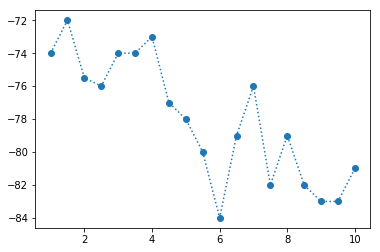

In [30]:
plt.plot(resultados['d(m)'], resultados['RSSI(dBm)'], marker='o', linestyle = ':' )

# RSSI em Função da Distância

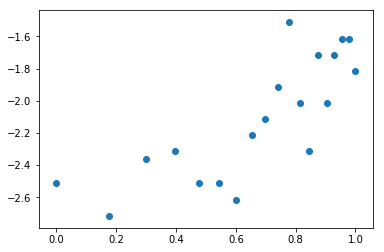

In [31]:
plt.scatter(resultados['x'], resultados['y'])

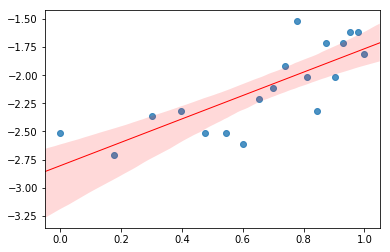

In [32]:
sns.regplot(x=resultados['x'], y=resultados['y'], line_kws={"color":"r","lw":1} )

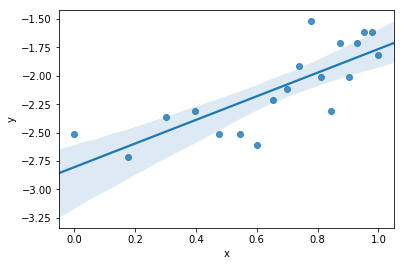

In [33]:
sns.regplot(x=resultadosDataFrame['x'], y=resultadosDataFrame["y"])

In [34]:
arquivo = open(input('Nome do arquivo (X:'), 'w')
for i in resultados['x']:
    arquivo.write(str(i)+"\n")
arquivo.close()

Nome do arquivo (X:x.txt


In [35]:
arquivo = open(input('Nome do arquivo (Y):'), 'w')
for i in resultados['y']:
    arquivo.write(str(i)+"\n")
arquivo.close()

Nome do arquivo (Y):y.txt
